In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('AB_NYC_2019.csv')

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [12]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [14]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [16]:
df.reviews_per_month.isnull().sum()

0

In [17]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
len(df.neighbourhood.unique())

221

In [19]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [27]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [88]:
max_tresh = df['number_of_reviews'].quantile(0.70)
max_tresh

17.0

In [89]:
min_tresh = df['number_of_reviews'].quantile(0.30)
min_tresh

1.0

In [115]:
ad = df[df['number_of_reviews']<max_tresh]

In [116]:
add = df[df['number_of_reviews']>min_tresh]

In [117]:
df[(df['number_of_reviews']<max_tresh) & (df['number_of_reviews']>min_tresh)]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
20,Sweet and Spacious Brooklyn Loft,21207,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0
41,Beautiful Sunny Park Slope Brooklyn,47610,Brooklyn,South Slope,40.66278,-73.97966,Entire home/apt,120,3,15,0.39,1,345
45,Entire apartment in central Brooklyn neighborh...,49670,Brooklyn,Prospect-Lefferts Gardens,40.65944,-73.96238,Entire home/apt,150,29,11,0.49,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48351,A homey home.,272327753,Brooklyn,Bay Ridge,40.62373,-74.02676,Entire home/apt,200,1,2,2.00,1,356
48634,"One bedroom without roomies, close to everything",273361532,Manhattan,Upper West Side,40.80281,-73.96550,Entire home/apt,110,3,2,2.00,1,15
48636,2-MONTH SUBLEASE (WITH EARLY MOVE-IN),52984497,Brooklyn,Bedford-Stuyvesant,40.68914,-73.92408,Private room,33,30,2,2.00,1,87
48701,Comfortable clean Bedstuy private room,267932490,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45,1,2,2.00,1,14


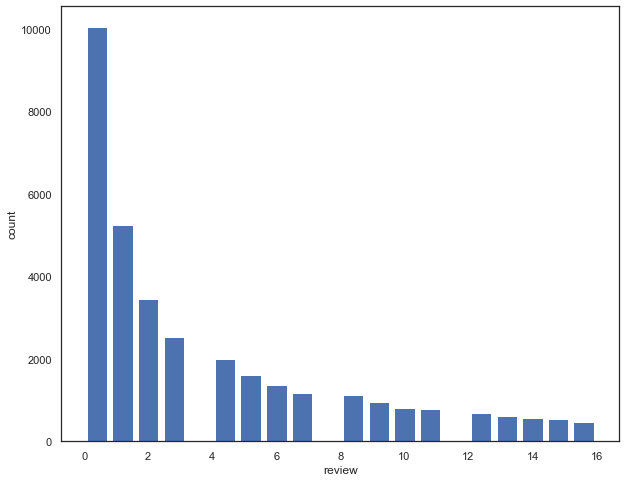

In [121]:
from scipy.stats import norm
import numpy as np

plt.hist(ad['number_of_reviews'], bins = 20,rwidth = 0.8)
plt.xlabel('review')
plt.ylabel('count')
plt.show()

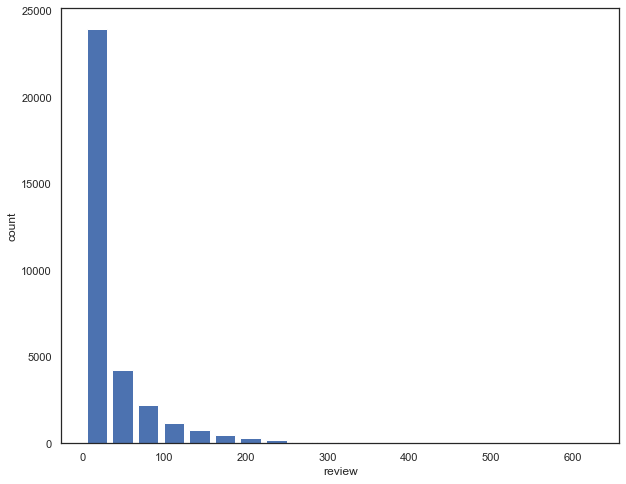

In [120]:
from scipy.stats import norm
import numpy as np

plt.hist(add['number_of_reviews'], bins = 20,rwidth = 0.8)
plt.xlabel('review')
plt.ylabel('count')
plt.show()